In [1]:
from tools.paddy_funcs import *

Using TensorFlow backend.
/usr/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# combine all hits and directions from a particular volume
volume_id = 8 
event_number = 1000
event_number_HIGH = 1032
allhits = np.load("hits_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
alldirections = np.load("direction_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
for event_number in range(event_number + 1,event_number_HIGH,1):
    atemp = np.load("hits_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
    btemp = np.load("direction_info_Vol_" + str(volume_id) + "_event_" + str(event_number) + ".npy")
    allhits = np.concatenate((allhits, atemp))
    alldirections = np.concatenate((alldirections, btemp))
print np.shape(allhits), np.shape(alldirections)

(26955, 150) (26955, 3)


##  THE NEURAL NET

In [6]:
# the NN
NNmodel = Sequential()
NNmodel.add(Dense(units=x_train.shape[1], input_dim=x_train.shape[1]))
NNmodel.add(Activation('relu'))
NNmodel.add(Dense(units=x_train.shape[1]))
NNmodel.add(Activation('relu'))
NNmodel.add(Dense(units=int(0.25 * x_train.shape[1])))
NNmodel.add(Activation('relu'))
NNmodel.add(Dense(units=y_train.shape[1]))
#NNmodel.add(Activation('tanh'))          
NNmodel.compile(optimizer='adam', loss='cosine_proximity', metrics=['accuracy'])

In [3]:
x = allhits
y = alldirections
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.99, random_state=1974)

In [121]:
#NNmodel.load_weights('Vol8NN.h5')
NNmodel.load_weights('Vol8_big_trainNN_3.h5')

In [122]:
NNmodel.evaluate(x_test, y_test)

26656/26686 [============================>.] - ETA: 0s

[-0.23303991111355155, 0.7735516750445334]

## Some plots

0.011930369129728103


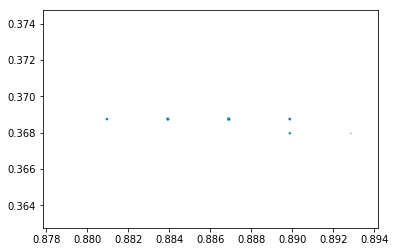

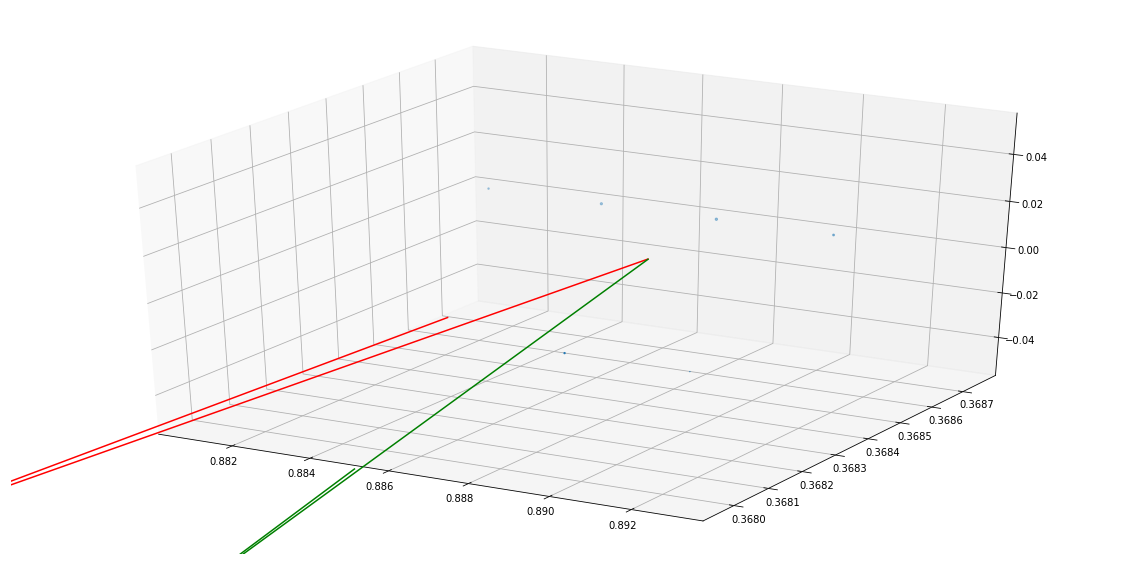

In [123]:
display_hit(1000, 8, 1, NNmodel)

In [126]:
ii=len(alldirections)
scan = np.empty([ii,5])
j=0
for hit, truedirection in zip(allhits[:ii], alldirections[:ii]):
    pred = predict_direction(hit, NNmodel)
    anglebetween = np.dot(pred, truedirection)
    scan[j] = np.concatenate((Cart_to_Sph(pred)[1::], Cart_to_Sph(truedirection)[1::], [anglebetween]))
    j += 1

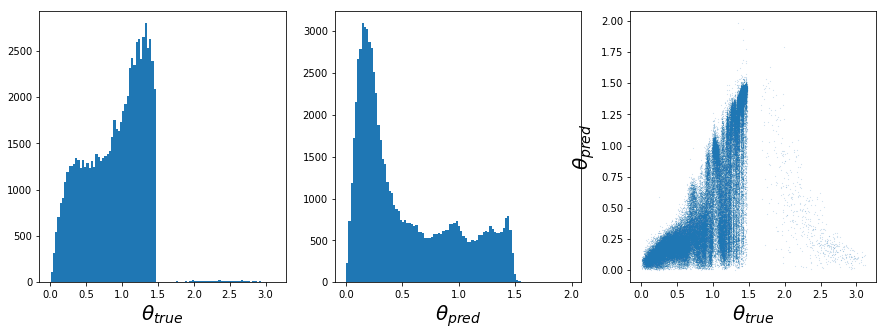

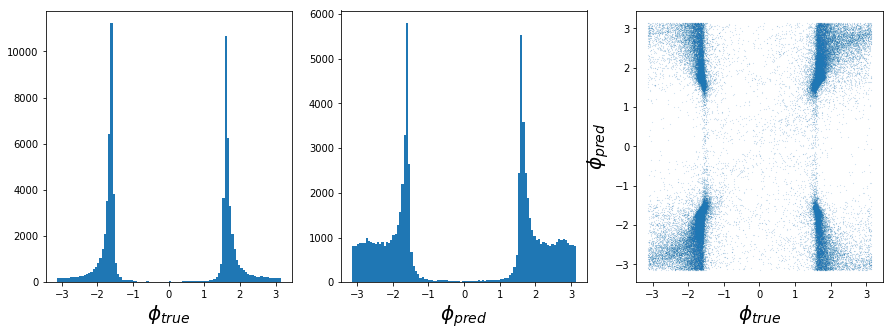

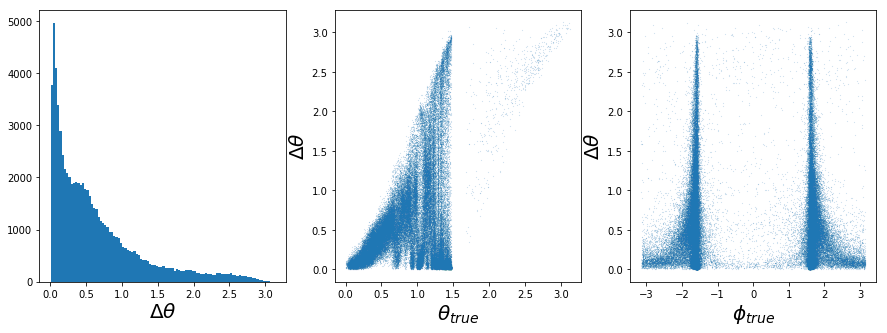

In [127]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.hist(scan[:,2],bins=100)
ax1.set_xlabel(r'$\theta_{true}$', fontsize=20)
ax2.hist(scan[:,0],bins=100)
ax2.set_xlabel(r'$\theta_{pred}$', fontsize=20)
ax3.scatter(scan[:,2], scan[:,0], s=0.005 )
ax3.set_xlabel(r'$\theta_{true}$', fontsize=20)
ax3.set_ylabel(r'$\theta_{pred}$', fontsize=20)

f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.hist(scan[:,3],bins=100)
ax1.set_xlabel(r'$\phi_{true}$', fontsize=20)
ax2.hist(scan[:,1],bins=100)
ax2.set_xlabel(r'$\phi_{pred}$', fontsize=20)
ax3.scatter(scan[:,3], scan[:,1], s=0.005 )
ax3.set_xlabel(r'$\phi_{true}$', fontsize=20)
ax3.set_ylabel(r'$\phi_{pred}$', fontsize=20)

f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.hist(np.arccos(scan[:,4]),bins=100)
ax1.set_xlabel(r'$\Delta\theta$', fontsize=20)
ax2.scatter(scan[:,2], np.arccos(scan[:,4]), s=0.005 )
ax2.set_xlabel(r'$\theta_{true}$', fontsize=20)
ax2.set_ylabel(r'$\Delta\theta$', fontsize=20)
ax3.scatter(scan[:,3], np.arccos(scan[:,4]), s=0.005 )
ax3.set_xlabel(r'$\phi_{true}$', fontsize=20)
ax3.set_ylabel(r'$\Delta\theta$', fontsize=20)

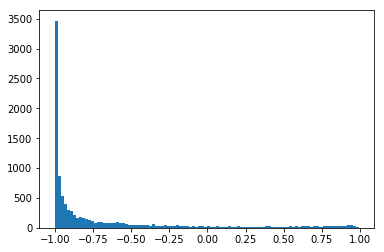

In [118]:
plt.hist(-scan[:,4],bins=100)
plt.show()

In [120]:
print np.mean(scan[:,4])

0.6847030383865654
